In [9]:
import DIMethod as di

eq = 'sin(2*x+1)*(2*x)'

data = di.ComputeTabularMethod(eq,100)

u = 2
dv = x*sin(2*x + 1)
diff_list = [2, 0]
integral_list = [x*sin(2*x + 1), -x*cos(2*x + 1)/2 + sin(2*x + 1)/4, -x*sin(2*x + 1)/4 - cos(2*x + 1)/4]


In [10]:
data

{'message': 'Function can be splitted into two parts and the solution is: -x*cos(2*x + 1) + sin(2*x + 1)/2 + C',
 'u': 2,
 'dv': -x*sin(2*x + 1)/4 - cos(2*x + 1)/4,
 'diff_list': [2, 0],
 'integral_list': [x*sin(2*x + 1),
  -x*cos(2*x + 1)/2 + sin(2*x + 1)/4,
  -x*sin(2*x + 1)/4 - cos(2*x + 1)/4],
 'result': -x*cos(2*x + 1) + sin(2*x + 1)/2}

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

dfDiff = pd.DataFrame(data['diff_list'], columns=['diff_list'])
dfInt = pd.DataFrame(data['integral_list'], columns=['integral_list'])

In [12]:
dfDiff

,diff_list
0,2
1,0


In [13]:
dfInt

,integral_list
0,x*sin(2*x + 1)
1,-x*cos(2*x + 1)/2 + sin(2*x + 1)/4
2,-x*sin(2*x + 1)/4 - cos(2*x + 1)/4


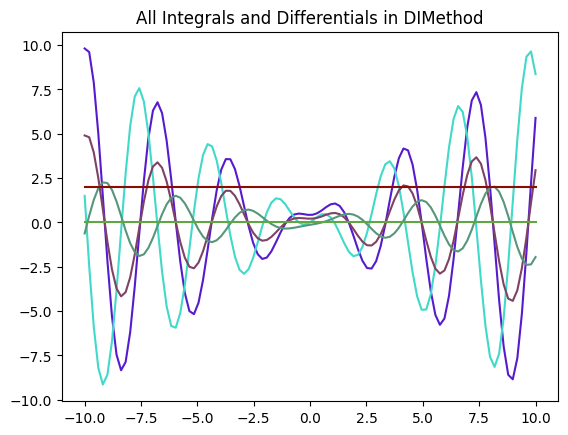

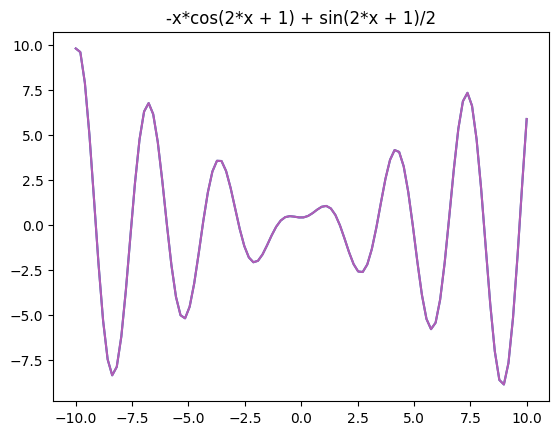

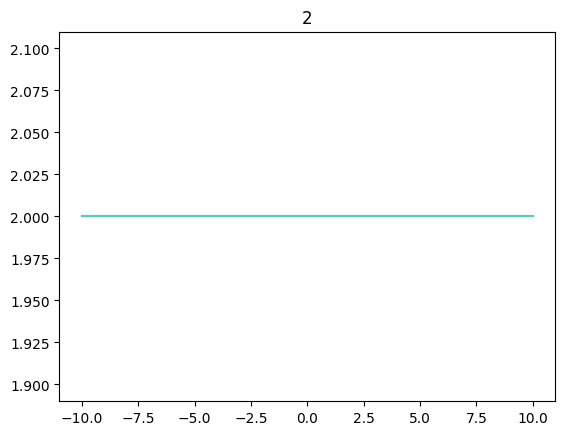

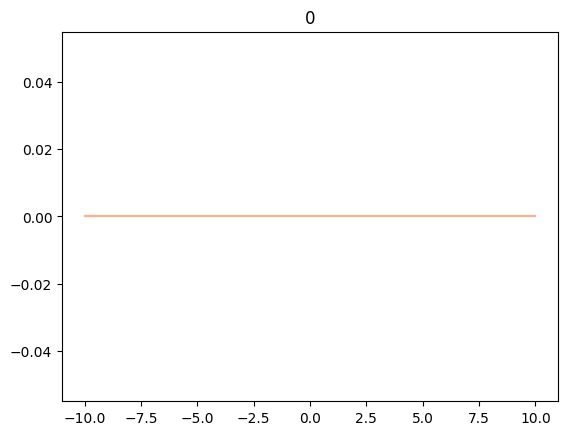

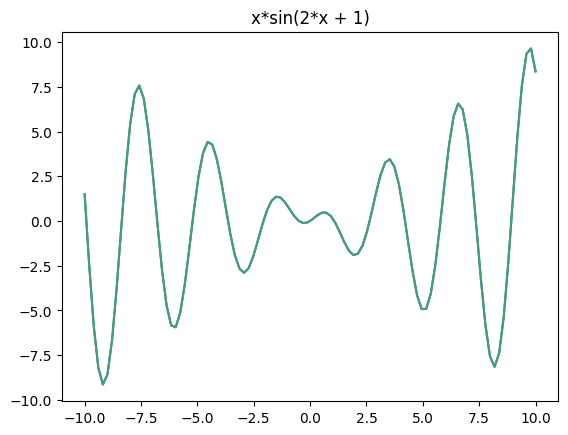

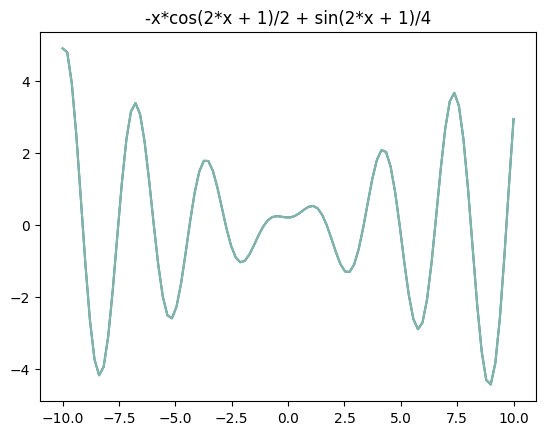

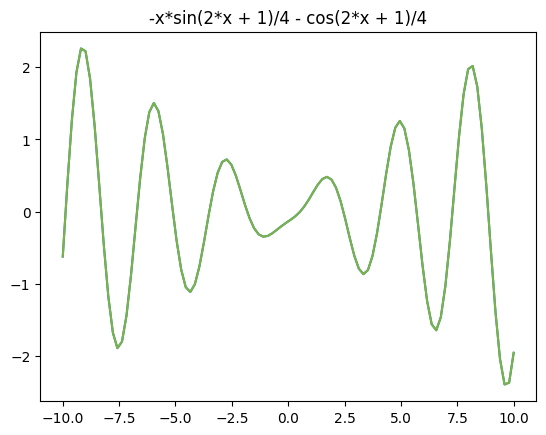

In [16]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

x = sp.Symbol('x')

def plot(f, a, b, n):
    # create a list of x values
    x_values = np.linspace(a, b, n)
    # create a list of y values
    y_values = []
    # create a for loop to compute the y values
    for i in x_values:
        # compute the y value
        y = f.subs(x, i)
        # append the y value to the list
        y_values.append(y)
    # create a plot
    plt.plot(x_values, y_values)
    import random
    r = lambda: random.randint(0,255)
    # set the color of the plot
    plt.plot(x_values, y_values, color='#%02X%02X%02X' % (r(),r(),r()))
    # show title    
    plt.title(f)
    # show the plot
    plt.show()

def plotAll(integrals,answer, diffs):
    import random
    r = lambda: random.randint(0,255)
    x_values = np.linspace(-10, 10, 100)
    y_values = []
    for i in x_values:
        y = answer.subs(x, i)
        y_values.append(y)
    plt.plot(x_values, y_values, color='#%02X%02X%02X' % (r(),r(),r()))
    for i in range(len(integrals)):
        y_values = []
        for j in x_values:
            y = integrals[i].subs(x, j)
            y_values.append(y)
        plt.plot(x_values, y_values, color='#%02X%02X%02X' % (r(),r(),r()))
    for i in range(len(diffs)):
        y_values = []
        for j in x_values:
            y = diffs[i].subs(x, j)
            y_values.append(y)
        plt.plot(x_values, y_values, color='#%02X%02X%02X' % (r(),r(),r()))
    
    plt.title('All Integrals and Differentials in DIMethod')
    plt.show()
plotAll(dfInt['integral_list'], data['result'], dfDiff['diff_list'])

plot(data['result'], -10, 10, 100)

for i in range(len(dfDiff)):    
    plot(dfDiff['diff_list'][i], -10, 10, 100)

for i in range(len(dfInt)):
    plot(dfInt['integral_list'][i], -10, 10, 100)

#plot result with all diff and integral in one graph